In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

torch.set_printoptions(sci_mode = False)

# Simulate divergence-free fields

We simualte divergence-free vector fields (use hyphen) that are akin to ice flow. 

Ice Flux Divergence

$\nabla \cdot (H \mathbf{v}) = \frac{\partial (H u)}{\partial x} + \frac{\partial (H v)}{\partial y} = 0$,

where 
- $u$ is the velocity in x-direction (horizontal), and 
- $v$ is the velocity in y-direction (vertical).

Both velocity components can be derived from the *stream function* $\psi$.

- $u = \frac{\partial \psi}{\partial y}$, and
- $v = -\frac{\partial \psi}{\partial x}$.

The continuity equation for incompressible 2D flow states that

$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0$

which is automaticall satisfied for *stream functions* $\psi$.

## Notes:
- Numpy indexing starts top-left (as PyTorch) and uses row-major indexing (y-axis, x-axis)
- We fix all grids to [0, 1] and [0, 1]

# (A) Converging flow

- [Resource:](https://runestone.academy/ns/books/published/acmulti/S_Vector_Div.html)
- [another](https://www.geogebra.org/m/cXgNb58T)

Ice flux vector:

$$ \mathbf{v} = (y, x) $$

$$ u(x, y) = y, \quad v(x, y) = x $$

In [148]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

# Field (2d grid)
X1, X2 = np.meshgrid(x1, x2)
# X1 are the x coordinates
# X2 are the y coordinates (mirror X2 to have the origin at the bottom left)
print(X2[0])
print(X2[-1])

# swapped
U = X2 # y coordinates
V = X1 # x coordinates

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
def simulate_convergence(X1, X2):
    U = X2
    V = X1
    return U, V

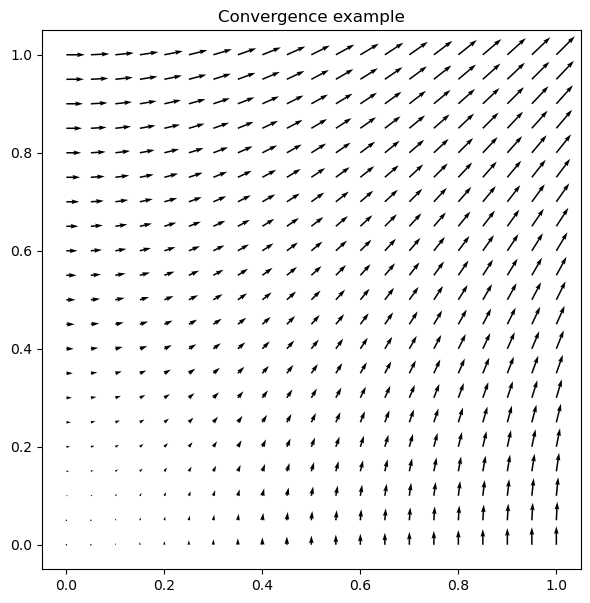

In [149]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
# swapping U and V to have the classical plot
ax.quiver(X1, X2, U, V, color = 'black')

# Add streamlines
# ax.contour(X1, X2, psi, levels = 20, cmap = 'coolwarm')

ax.set_aspect('equal')
plt.title('Convergence example')
 
# show plot
plt.show()

In [150]:
# This function actually works for xy ordering
# based on matlab code (xy ordering)

def calc_divergence(f, dx, dy):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of 2 ndarrays
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    return np.ufunc.reduce(np.add, [np.gradient(f[0], dx, axis = 1), np.gradient(f[1], dy, axis = 0)])

calc_divergence([U, V], 0.05, 0.05).max()

0.0

## Divergence check

In [151]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0))

Divergence in x-direction are all zero?! True or False? True
Divergence in y-direction are all zero?! True or False? True
The vector field divergence free?! True or False? True


## (B) Merge & Curve

In [152]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

# U = 1.0 but shape of array
U = np.ones_like(X1) # diverging
# This works too because it does not depend on X1 for x 
# U = (X2+1)**2 # curving
# merging and curve
U = (X2+0.5)**2

V = np.sin(X1 * math.pi)

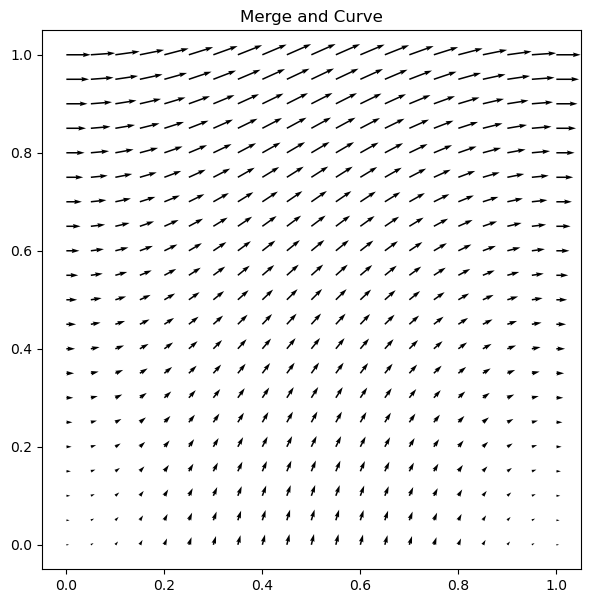

In [153]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('Merge and Curve')
 
# show plot
plt.show()

In [154]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0))

Divergence in x-direction are all zero?! True or False? True
Divergence in y-direction are all zero?! True or False? True
The vector field divergence free?! True or False? True


# (C) Splitting

X and y components have non-zero divergence.

In [155]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

U = X1 * X2 # diverging
V = - 0.5 * X2**2 + (X1 - 0.8)

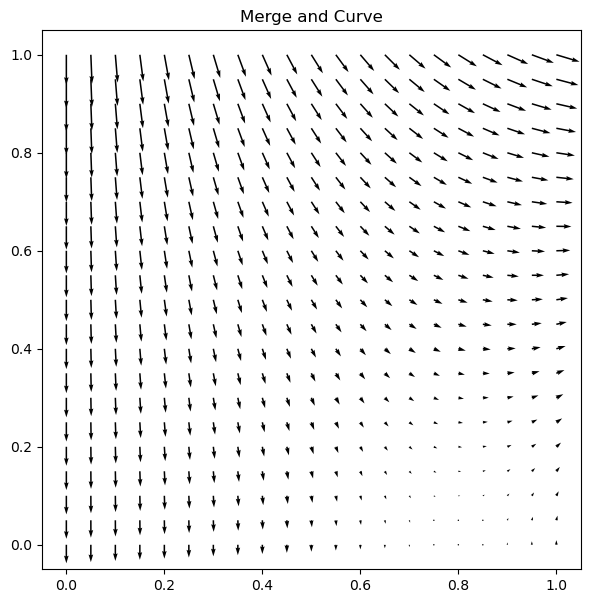

In [156]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('Merge and Curve')
 
# show plot
plt.show()

In [157]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.05))

Divergence in x-direction are all zero?! True or False? False
Divergence in y-direction are all zero?! True or False? False
The vector field divergence free?! True or False? True


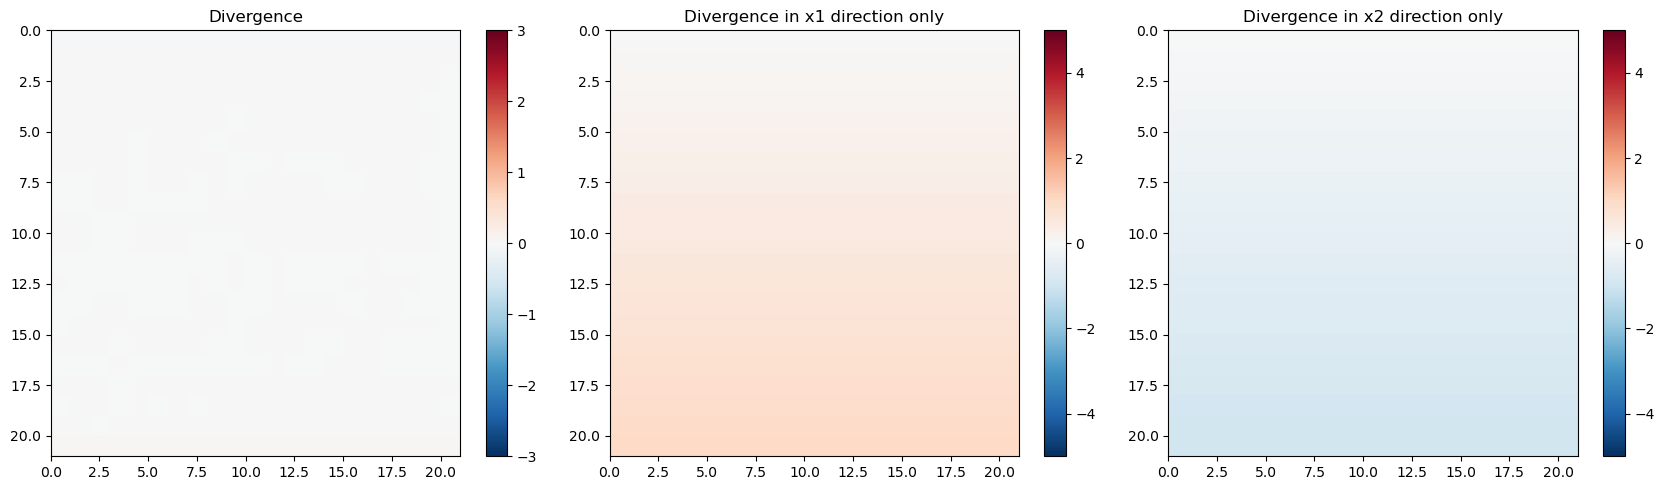

In [158]:
# Compute gradients (finite differences)
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize = (17, 5))

combined_color_max = 3
color_max = 5

# First subplot: Divergence
c1 = axs[0].pcolormesh((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), cmap = 'RdBu_r', vmin = - combined_color_max, vmax = combined_color_max)
# Invert y-axis to match tensor indexing
axs[0].invert_yaxis()
axs[0].set_title('Divergence')
fig.colorbar(c1, ax = axs[0])

# First subplot: Divergence in x1 direction
c2 = axs[1].pcolormesh(np.gradient(U, dx, axis = 1), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[1].invert_yaxis()
axs[1].set_title('Divergence in x1 direction only')
fig.colorbar(c2, ax = axs[1])

# Second subplot: Divergence in x2 direction
c3 = axs[2].pcolormesh(np.gradient(V, dy, axis = 0), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[2].invert_yaxis()
axs[2].set_title('Divergence in x2 direction only')
fig.colorbar(c3, ax = axs[2])

# Show the plot
plt.tight_layout()
plt.show()

# (D) (not divergence free yet)

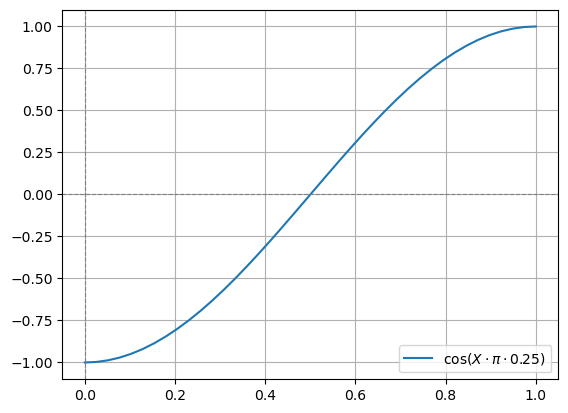

In [191]:
# Generate X values
X = np.linspace(0, 1, 40)  # Range from -10 to 10 with 400 points

# Compute Y values
Y = np.sin((X - 0.5) * math.pi)

# Plot the function
plt.plot(X, Y, label=r'$\cos(X \cdot \pi \cdot 0.25)$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Horizontal axis
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Vertical axis
plt.legend()
plt.grid()
plt.show()

In [259]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(-3, 3, N_grid_x1) # x
x2 = np.linspace(-3, 3, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

U = X2 # diverging
U = np.sin((X1 - 0.5) * math.pi) # diverging 
V = np.ones_like(X1) # diverging
# V = np.sin((X2 - 0.5) * math.pi)**2

obstable_size = 1.0
factor = 1.0

U = factor * (1 - obstable_size**2 / (X1**2 + X2**2))
V = -2 * factor * obstable_size**2 * X1 * X2 / (X1**2 + X2**2)**2

/tmp/ipykernel_854024/2857996116.py:24: RuntimeWarning: divide by zero encountered in true_divide
  U = factor * (1 - obstable_size**2 / (X1**2 + X2**2))
/tmp/ipykernel_854024/2857996116.py:25: RuntimeWarning: invalid value encountered in true_divide
  V = -2 * factor * obstable_size**2 * X1 * X2 / (X1**2 + X2**2)**2


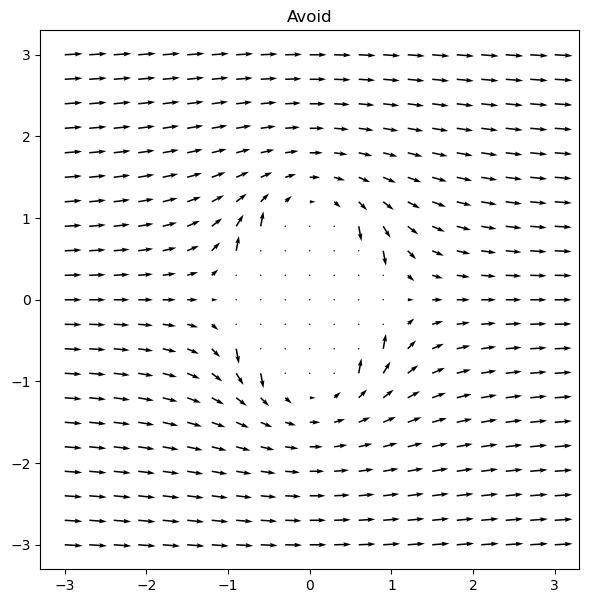

In [260]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

mask = (X1**2 + X2**2) < obstable_size**2
U[mask] = 0.0
V[mask] = 0.0

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('Avoid')
 
# show plot
plt.show()

In [261]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.05))

Divergence in x-direction are all zero?! True or False? False
Divergence in y-direction are all zero?! True or False? False
The vector field divergence free?! True or False? False


# (E) Alternative

In [294]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(-3, 3, N_grid_x1) # x
x2 = np.linspace(-3, 3, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

# U = factor * (1 - obstable_size**2 / (X1**2 + X2**2))
# V = -2 * factor * obstable_size**2 * X1 * X2 / (X1**2 + X2**2)**2

# U = (X2 * np.sqrt(X1**2) + 0.5) **2
U = X2**2

V = -2*X2*X1
# V = np.ones_like(X1)- 2*X2*X1
# V = np.zeros_like(X1)

plt.show()

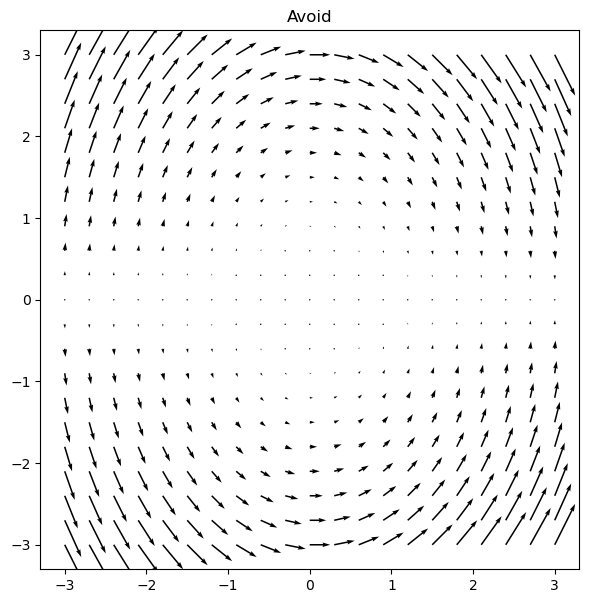

In [295]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('Avoid')
 
# show plot
plt.show()

In [ ]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.05))

In [ ]:
# Compute gradients (finite differences)
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize = (17, 5))

combined_color_max = 3
color_max = 5

# First subplot: Divergence
c1 = axs[0].pcolormesh((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), cmap = 'RdBu_r', vmin = - combined_color_max, vmax = combined_color_max)
# Invert y-axis to match tensor indexing
axs[0].invert_yaxis()
axs[0].set_title('Divergence')
fig.colorbar(c1, ax = axs[0])

# First subplot: Divergence in x1 direction
c2 = axs[1].pcolormesh(np.gradient(U, dx, axis = 1), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[1].invert_yaxis()
axs[1].set_title('Divergence in x1 direction only')
fig.colorbar(c2, ax = axs[1])

# Second subplot: Divergence in x2 direction
c3 = axs[2].pcolormesh(np.gradient(V, dy, axis = 0), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[2].invert_yaxis()
axs[2].set_title('Divergence in x2 direction only')
fig.colorbar(c3, ax = axs[2])

# Show the plot
plt.tight_layout()
plt.show()

(Other)

## divergt

In [140]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20
N_grid_x2 = N_grid_x1
# overwrite to have higher detail

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(-4, 4, N_grid_x1)
x2 = np.linspace(4, -4, N_grid_x2)

# Field (2d grid)
X1, X2 = np.meshgrid(x1, x2)

# Define params
a = 0.01
sigma = 10**(-4) # same as 1e-4

In [152]:
def F1F2_function(X1, X2):
    # Takes two meshgrid fields as inputs and returns the F1 and F2 fields
    # Multiply fields elementwise once 
    F1 = X2**2
    F2 = - 2*X2*X1
    return F1, F2

# Call function
F1, F2 = F1F2_function(X1, X2)

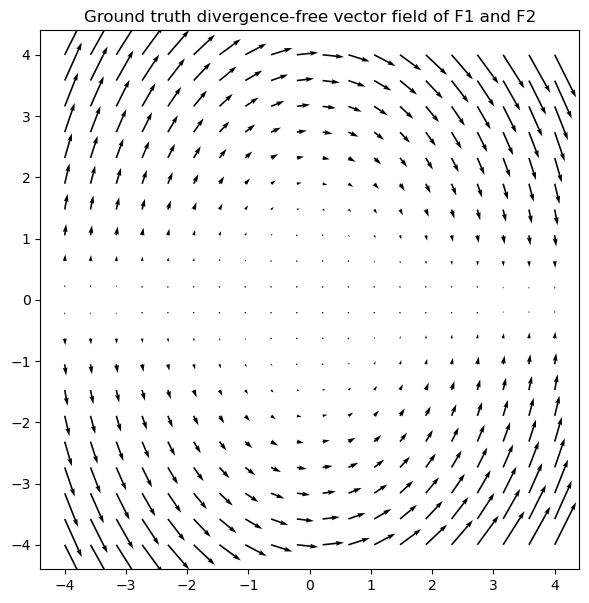

In [153]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, F1, F2, color = 'black')

ax.set_aspect('equal')
plt.title('Ground truth divergence-free vector field of F1 and F2')
 
# show plot
plt.show()

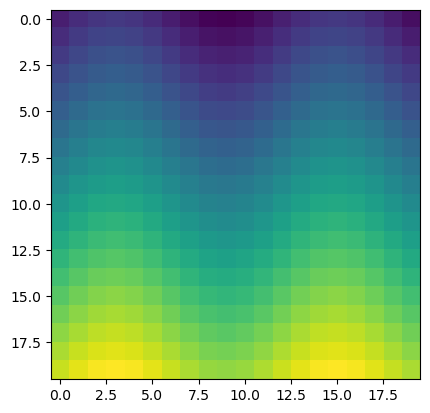

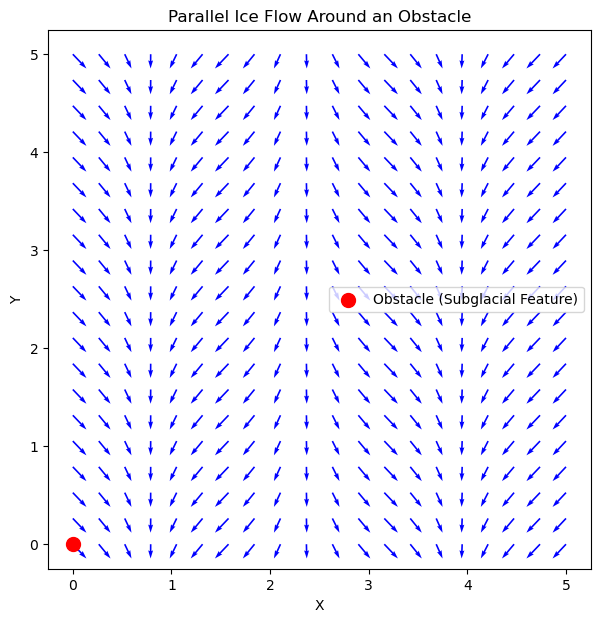

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 20)
X, Y = np.meshgrid(x, y)

# Define stream function (ensures parallel flow with obstacle deflection)
psi = Y + 0.5 * np.sin(2 * np.pi * X / 3)
psi = Y + 0.5 * np.sin(2 * X)

plt.imshow(psi)

# Compute velocity field
U = np.gradient(psi, axis = 1)  # u = ∂ψ/∂y
V = - np.gradient(psi, axis = 0) # v = -∂ψ/∂x

# Plot vector field (quiver plot)
plt.figure(figsize=(7, 7))
plt.quiver(X, Y, U, V, color='b', scale=10)
#plt.streamplot(X, Y, U, V, color='k', linewidth=1, density=1.2)

# Mark the obstacle
plt.scatter(0, 0, color='red', s=100, label="Obstacle (Subglacial Feature)")

# Labels and formatting
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Parallel Ice Flow Around an Obstacle")
plt.legend()
plt.show()

In [128]:
dx1, dx2 = X1[0,1] - X1[0,0], X2[1,0] - X2[0,0]
print(dx1, dx2)

0.21052631578947367 0.21052631578947367


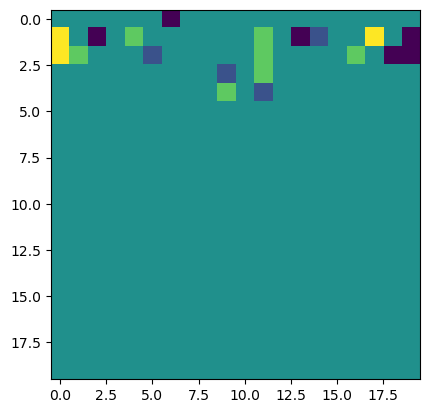

In [129]:
np.gradient(U, axis = 1)
plt.imshow(np.gradient(U, axis = 0, ))
plt.imshow(np.gradient(V, axis = 1))

plt.imshow(np.gradient(U, dx1, axis = 0) + np.gradient(V, dx1, axis = 1))

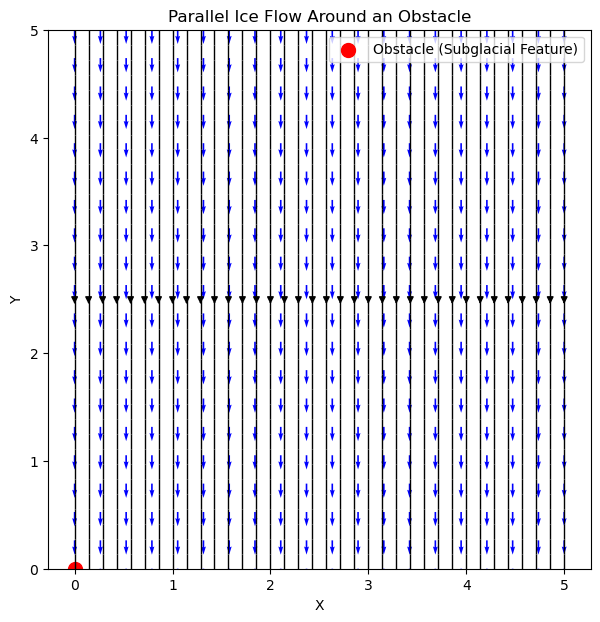

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 20)
X, Y = np.meshgrid(x, y)

# Define stream function (ensures parallel flow with obstacle deflection)
psi = Y

# Compute velocity field
U = np.gradient(psi, axis=1)  # u = ∂ψ/∂y
V = -np.gradient(psi, axis=0) # v = -∂ψ/∂x

# Plot vector field (quiver plot)
plt.figure(figsize=(7, 7))
plt.quiver(X, Y, U, V, color='b', scale=10)
plt.streamplot(X, Y, U, V, color='k', linewidth=1, density=1.2)

# Mark the obstacle
plt.scatter(0, 0, color='red', s=100, label="Obstacle (Subglacial Feature)")

# Labels and formatting
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Parallel Ice Flow Around an Obstacle")
plt.legend()
plt.show()

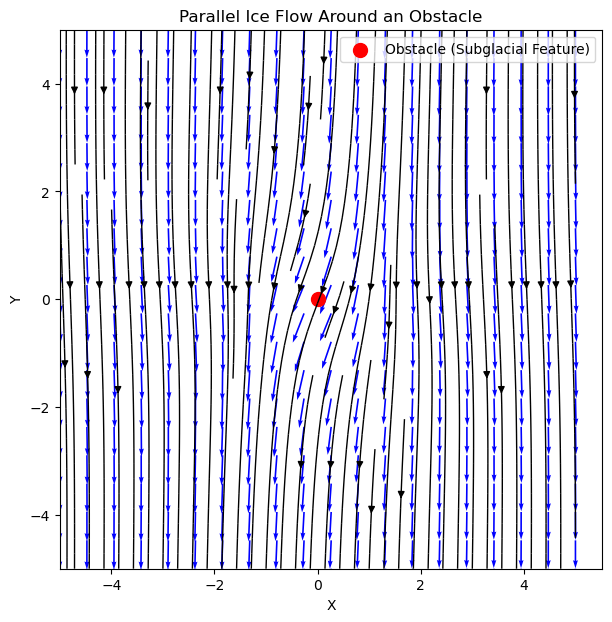

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Define stream function (ensures parallel flow with obstacle deflection)
psi = Y - (X / (X**2 + Y**2 + 2))  # Parallel flow with deflection near obstacle

# Compute velocity field
U = np.gradient(psi, axis=1)  # u = ∂ψ/∂y
V = -np.gradient(psi, axis=0) # v = -∂ψ/∂x

# Plot vector field (quiver plot)
plt.figure(figsize=(7, 7))
plt.quiver(X, Y, U, V, color='b', scale=10)
plt.streamplot(X, Y, U, V, color='k', linewidth=1, density=1.2)

# Mark the obstacle
plt.scatter(0, 0, color='red', s=100, label="Obstacle (Subglacial Feature)")

# Labels and formatting
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Parallel Ice Flow Around an Obstacle")
plt.legend()
plt.show()


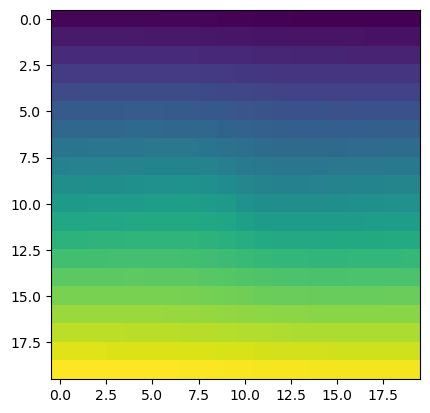

In [132]:
plt.imshow(psi)